In [1]:
#Author: @michaelbrink
#Org: BalloonBox Inc.

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Imported the data files

In [3]:
df_all = pd.read_csv('Fortune500_cleaned.csv')
df_detail = pd.read_csv('Fortune500-2_cleaned.csv')

# Visualization

## df_all

In [4]:
df_all

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Change in rank (1000),Employees,...,Market Value ($M)_cat_1,Market Value ($M)_cat_2,Market Value ($M)_cat_3,Market Value ($M)_cat_4,Market Value ($M)_cat_5,Employees_cat_1,Employees_cat_2,Employees_cat_3,Employees_cat_4,Employees_cat_5
0,11,AmerisourceBergen,146850.0,8.0,1427.9,0.0,33656.0,19229.0,1,18500,...,0,0,0,0,1,0,0,0,1,0
1,15,Cardinal Health,121546.0,18.5,1427.0,17.4,34122.0,25725.0,6,37300,...,0,0,0,0,1,0,0,0,0,1
2,34,Phillips 66,72396.0,-16.9,1555.0,-63.2,51653.0,40954.0,-4,14800,...,0,0,0,0,1,0,0,0,1,0
3,37,Valero Energy,70166.0,-14.2,2289.0,-42.6,46173.0,29746.0,-5,9996,...,0,0,0,0,1,0,0,1,0,0
4,45,Archer Daniels Midland,62346.0,-7.9,1279.0,-30.8,39769.0,26274.0,-4,31800,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,996,Mr. Cooper Group,2007.0,0.0,274.0,0.0,18305.0,674.1,0,9100,...,1,0,0,0,0,0,0,1,0,0
2797,997,Herc Holdings,1999.0,1.1,47.5,-31.3,3817.0,590.5,-4,5100,...,1,0,0,0,0,0,1,0,0,0
2798,998,Healthpeak Properties,1997.4,8.2,45.5,-95.7,14032.9,12059.3,0,204,...,0,0,0,1,0,1,0,0,0,0
2799,999,SPX FLOW,1996.3,-4.5,-95.1,-316.1,2437.4,1211.8,-37,5000,...,1,0,0,0,0,0,1,0,0,0


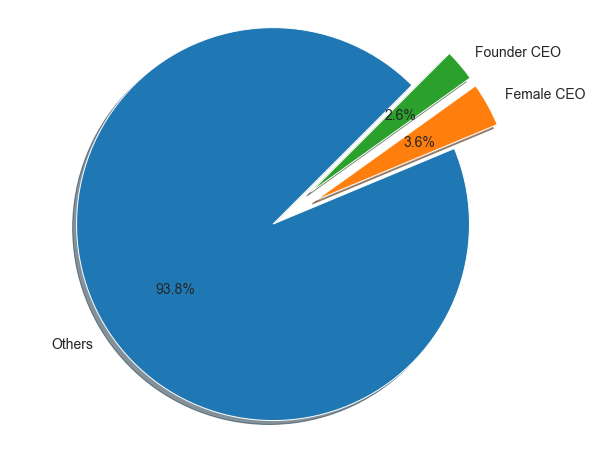

In [5]:
# Pie Chart for the categories of CEO
df_temp = df_all.copy()
sizes = list(df_temp.sum()[['Filter_cat_0','Filter_cat_1','Filter_cat_2']])
# print(sizes)
labels = ['Others','Female CEO','Founder CEO']
explode = [0,0.25,0.25]

fig,ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14},startangle=45)
ax.axis('equal')
plt.show()

In [6]:
# Top 10 Companies that grows up fastest in rank
df_temp = df_all.copy()
df_temp = df_temp.groupby('Name')['Change in rank (1000)'].agg(['max'])
df_temp = df_temp.sort_values(by='max',ascending=False)
df_temp.iloc[:10,:]

,max
Name,
Cornerstone Building Brands,431
Andersons,364
Carvana,349
Envision Healthcare,340
Knight-Swift Transportation Holdings,328
OneMain Holdings,321
Olin,294
Diamondback Energy,288
TreeHouse Foods,259


In [7]:
# Top 10 Companies that fall down fastest in rank
df_temp = df_all.copy()
df_temp = df_temp.groupby('Name')['Change in rank (1000)'].agg(['min'])
df_temp = df_temp.sort_values(by='min',ascending=True)
df_temp.iloc[:10,:]

,min
Name,
Murphy Oil,-310
KKR,-309
Knight-Swift Transportation Holdings,-263
Carlyle Group,-243
EchoStar,-230
Visteon,-223
Trinity Industries,-221
Consol Energy,-219
HCP,-202


2017 4412.893 6256.81 6181.226 214.569
2018 4308.262 6367.127 6352.031 241.142
2019 4533.284 6366.902 6189.839 263.156
2020 4569.079 6884.181 4817.223 240.047


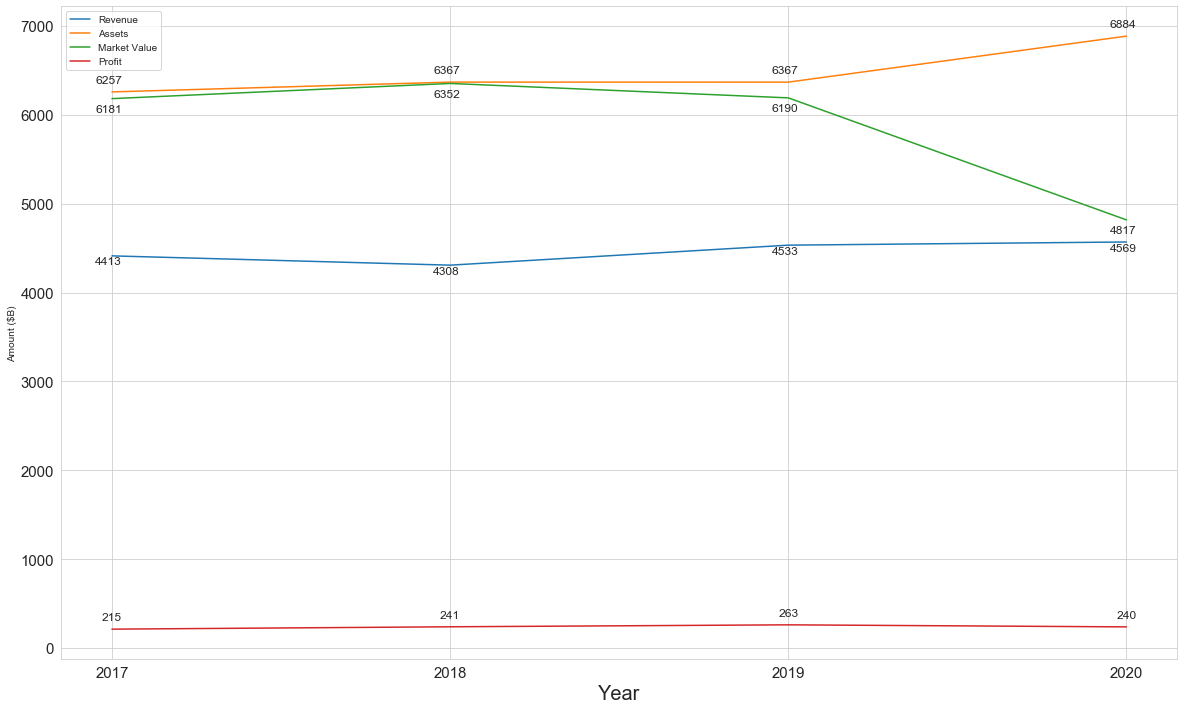

In [8]:
# The total Revenue, Profit, Market Value and Assets
df_temp = df_all.copy()
df_temp = df_all.groupby('Year').sum()[['Revenue ($M)','Profit ($M)','Assets ($M)','Market Value ($M)']]
df_temp = round(df_temp.reset_index())
# Convert them into Billion
df_temp['Revenue ($M)'] = df_temp['Revenue ($M)']/1000
df_temp['Profit ($M)'] = df_temp['Profit ($M)']/1000
df_temp['Assets ($M)'] = df_temp['Assets ($M)']/1000
df_temp['Market Value ($M)'] = df_temp['Market Value ($M)']/1000


plt.figure(figsize=(20,12))
ax = sns.lineplot(x='Year',y='Revenue ($M)',data=df_temp,label='Revenue')
sns.lineplot(x='Year',y='Assets ($M)',data=df_temp,label='Assets')
sns.lineplot(x='Year',y='Market Value ($M)',data=df_temp,label='Market Value')
sns.lineplot(x='Year',y='Profit ($M)',data=df_temp,label='Profit')
plt.tick_params(axis='both',labelsize=15)
plt.xticks([2017,2018,2019,2020])
plt.xlabel('Year',size=20)
plt.ylabel('Amount ($B)')
for x,r,a,m,p in zip(df_temp['Year'],df_temp['Revenue ($M)'],df_temp['Assets ($M)'],df_temp['Market Value ($M)'],df_temp['Profit ($M)']):
    print(x,r,a,m,p)
    ax.text(x-0.05,r-100,round(r),fontsize=12)
    ax.text(x-0.05,a+100,round(a),fontsize=12)
    ax.text(x-0.05,m-150,round(m),fontsize=12)
    ax.text(x-0.03,p+100,round(p),fontsize=12)
plt.show()

## df_detail

In [9]:
df_temp = df_detail.copy()
df_temp['Industry'] = df_temp['Industry'].replace('.*Wholesalers.*','Wholesalers',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Miscellaneous.*','Wholesalers',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Food.*','Food',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Beverages.*','Food',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Health.*','Health Care',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Medical.*','Health Care',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Electrical.*','Electrics',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Electronic.*','Electrics',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Oil.*','Energy',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Gas.*','Energy',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Petroleum.*','Energy',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Electrics.*','Energy',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Computer.*','IT',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Technology .*','IT',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Network.*','IT',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Construction.*','Construction',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Pipelines.*','Construction',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Building.*','Construction',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Retail.*','Retail',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Home.*','Home Necessity',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Financial.*','Finance',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Commercial.*','Finance',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Stock.*','Finance',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Airlines.*','Transportation',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Vehicles.*','Transportation',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Transportation.*','Transportation',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Railroads.*','Transportation',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Management.*','Management',regex=True)
df_temp['Industry'] = df_temp['Industry'].replace('.*Management.*','Management',regex=True)
df_temp = df_temp.groupby('Industry').sum()

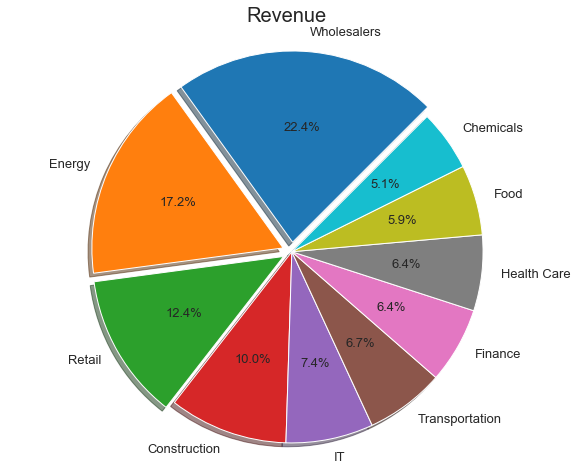

In [10]:
df_plot = df_temp.sort_values('Revenues ($M)',ascending=False)
df_plot = df_plot.iloc[:10,:6]

# Pie Chart for the categories of CEO
sizes = list(df_plot['Revenues ($M)'])
labels = list(df_plot.index)
explode = [0.05,0.05,0.05,0,0,0,0,0,0,0]

fig,ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 13},startangle=45)
plt.title('Revenue',fontsize=20)
ax.axis('equal')
plt.show()

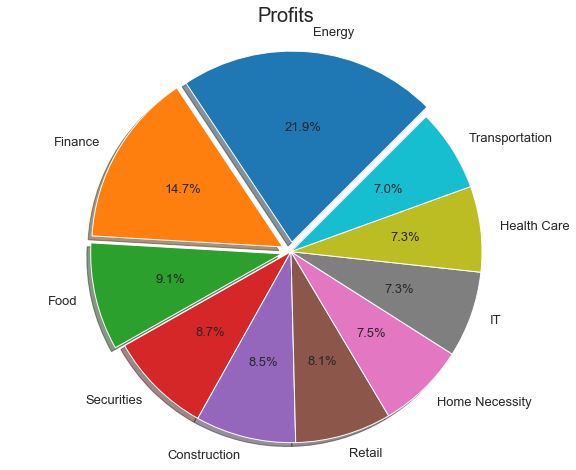

In [11]:
df_plot = df_temp.sort_values('Profits ($M)',ascending=False)
df_plot = df_plot.iloc[:10,:6]

# Pie Chart for the categories of CEO
sizes = list(df_plot['Profits ($M)'])
labels = list(df_plot.index)
explode = [0.05,0.05,0.05,0,0,0,0,0,0,0]

fig,ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 13},startangle=45)
plt.title('Profits',fontsize=20)
ax.axis('equal')
plt.show()

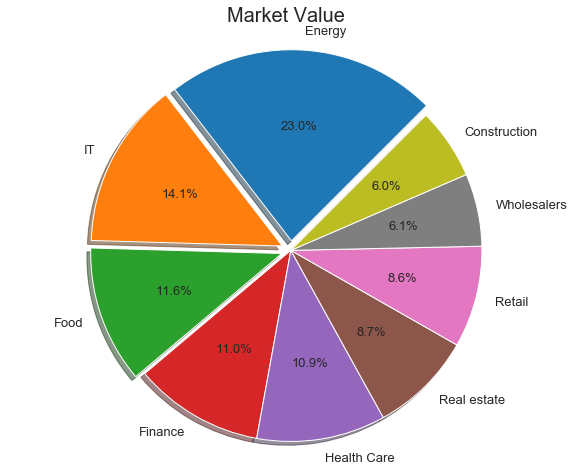

In [12]:
df_plot = df_temp.sort_values('Market Value ($M)',ascending=False)
df_plot = df_plot.iloc[:9,:6]

# Pie Chart for the categories of CEO
sizes = list(df_plot['Market Value ($M)'])
labels = list(df_plot.index)
explode = [0.05,0.05,0.05,0,0,0,0,0,0]

fig,ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 13},startangle=45)
plt.title('Market Value',fontsize=20)
ax.axis('equal')
plt.show()

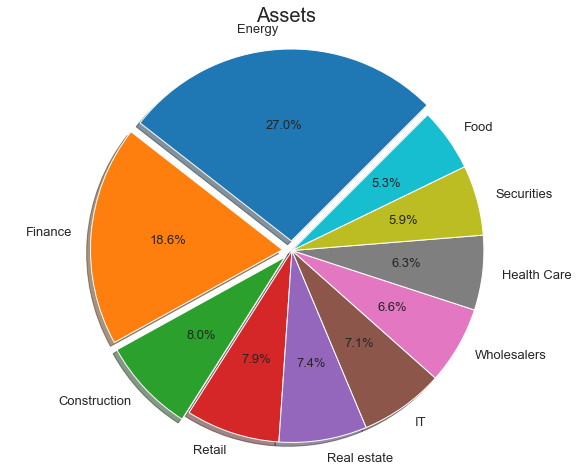

In [13]:
df_plot = df_temp.sort_values('Assets ($M)',ascending=False)
df_plot = df_plot.iloc[:10,:6]

# Pie Chart for the categories of CEO
sizes = list(df_plot['Assets ($M)'])
labels = list(df_plot.index)
explode = [0.05,0.05,0.05,0,0,0,0,0,0,0]

fig,ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 13},startangle=45)
plt.title('Assets',fontsize=20)
ax.axis('equal')
plt.show()

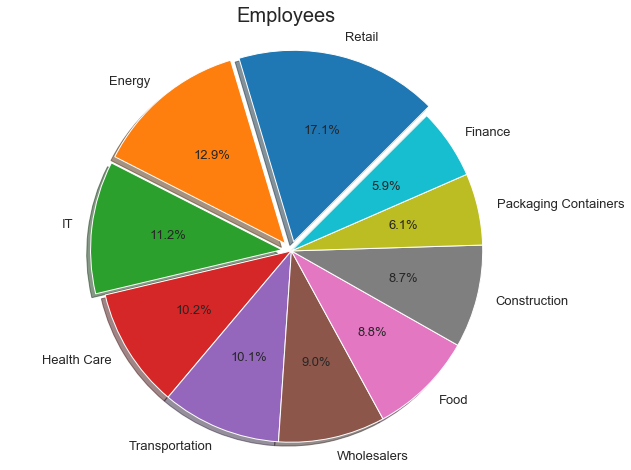

In [14]:
df_plot = df_temp.sort_values('Employees',ascending=False)
df_plot
df_plot = df_plot.iloc[:10,:6]

# Pie Chart for the categories of CEO
sizes = list(df_plot['Employees'])
labels = list(df_plot.index)
explode = [0.05,0.05,0.05,0,0,0,0,0,0,0]

fig,ax = plt.subplots(figsize=(10,8))
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 13},startangle=45)
plt.title('Employees',fontsize=20)
ax.axis('equal')
plt.show()